# Computer Vision : Count the number of connected components

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

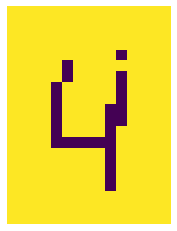

In [2]:
img = cv2.imread('demo.png',cv2.IMREAD_GRAYSCALE)
img = cv2.resize(img, (15, 20))
thresh = 128
img_binary = cv2.threshold(img, thresh, 1, cv2.THRESH_BINARY)[1]
plt.figure(figsize=(4,4))
plt.axis("off")
plt.imshow(img_binary)
plt.show()

In [3]:
img_binary

array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1],
       [1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1],
       [1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1],
       [1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1],
       [1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1],
       [1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1,

In [4]:
img_binary.shape

(20, 15)

In [5]:
scan_one = np.zeros(img_binary.shape,dtype=np.int8)

In [6]:
count = 0
eq_pairs = set()
for i in range(img_binary.shape[0]):
    for j in range(img_binary.shape[1]):
        if(img_binary[i][j] == 0):
            if(scan_one[max(0,i-1)][j] != 0 and scan_one[i][max(0,j-1)] != 0 ):
                    eq_pairs.add((scan_one[max(0,i-1)][j],scan_one[i][max(0,j-1)]))
                    scan_one[i][j] = scan_one[max(0,i-1)][j]
            elif(scan_one[max(0,i-1)][j] != 0):
                scan_one[i][j] = scan_one[max(0,i-1)][j]
            elif(scan_one[i][max(0,j-1)] != 0):
                scan_one[i][j] = scan_one[i][max(0,j-1)]
            else:
                scan_one[i][j] = count+1
                count+=1
                eq_pairs.add((scan_one[i][j],scan_one[i][j]))

In [7]:
for i in scan_one:
    for j in i:
        if(j == 0):
            print('',end='  ')
        else:
            print(j,end=' ')
    print()

                              
                              
                              
                              
                    1         
          2                   
          2         3         
        4           3         
        4           3         
        4         5 3         
        4         5 3         
        4         5           
        4 4 4 4 4 5           
                  5           
                  5           
                  5           
                  5           
                              
                              
                              


In [8]:
print(eq_pairs)

{(4, 4), (5, 5), (1, 1), (5, 4), (3, 3), (2, 2), (3, 5)}
